## Анализ метрик нового маркетплейса бразильских товаров. Поиск точек роста.
### Задачи

Задача 1: Оценить месячный retention в оформление заказа с помощью когортного анализа.  

Задача 2: Определить, существует ли product/market fit у этого маркетплейса.  

Задача 3: Определить 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.  

Задача 4: Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.  

Задача 5: Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять.  

Задача 6: Сформулировать выводы о проделанной работе и составить отчет.  



In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [4]:
orders = pd.read_csv('olist_orders_dataset.csv')

In [5]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [6]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [35]:
# Преобразую даты в формат даты

orders[['order_purchase_timestamp',\
        'order_approved_at',\
        'order_delivered_carrier_date',\
        'order_delivered_customer_date',\
        'order_estimated_delivery_date']] = orders[['order_purchase_timestamp',\
        'order_approved_at',\
        'order_delivered_carrier_date',\
        'order_delivered_customer_date',\
        'order_estimated_delivery_date']].apply(pd.to_datetime)


In [38]:
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [9]:
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

## Задача 1. Оцениваем месячный retention в оформление заказа с помощью когортного анализа.

In [10]:
# Фильтруем только доставленные заказы
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

# Присоединяем customer_unique_id по customer_id
delivered_orders = delivered_orders.merge(
    customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='left')

# Оставим нужные поля
delivered_orders = delivered_orders[['customer_unique_id', 'order_purchase_timestamp']].copy()

# Дата первой покупки (когорта)
delivered_orders['first_purchase_date'] = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'] \
                                                          .transform('min')

# Когорта = месяц первой покупки
delivered_orders['cohort'] = delivered_orders['first_purchase_date'].dt.to_period('M')

# Номер 30-дневного периода с момента первой покупки
delivered_orders['period_number_month'] = (
    (delivered_orders['order_purchase_timestamp'] - delivered_orders['first_purchase_date'])
    .dt.days // 30)

# Считаем уникальных пользователей в каждой когорте и периоде
cohort_data = delivered_orders.groupby(['cohort', 'period_number_month']) \
    .agg(n_customers=('customer_unique_id', 'nunique')) \
    .reset_index()

# Пивот
cohort_pivot = cohort_data.pivot(index='cohort', columns='period_number_month', values='n_customers')

# Размер когорт
cohort_size = cohort_pivot.iloc[:, 0]

# Retention
retention = cohort_pivot.divide(cohort_size, axis=0).round(3)

retention.head(10)




period_number_month,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,21
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.004,NaN,NaN,0.004,...,0.004,NaN,0.004,NaN,0.004,NaN,0.004,0.008,0.004,0.004
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.003,NaN,0.006,0.001,0.001,0.003,0.003,NaN,NaN,...,0.006,0.004,0.003,NaN,0.003,0.003,0.003,0.001,NaN,NaN
2017-02,1.0,0.001,0.002,0.004,0.002,0.001,0.002,0.001,0.001,0.003,...,0.004,0.001,0.002,0.001,0.001,0.001,0.002,NaN,NaN,NaN
2017-03,1.0,0.003,0.005,0.004,0.001,0.001,0.004,0.002,0.003,0.002,...,0.002,0.002,0.001,0.003,0.001,0.001,0.001,NaN,NaN,NaN
2017-04,1.0,0.004,0.003,0.000,0.003,0.004,0.003,0.004,0.003,0.002,...,0.001,NaN,0.001,0.001,0.001,0.001,NaN,NaN,NaN,NaN
2017-05,1.0,0.004,0.004,0.002,0.004,0.003,0.003,0.001,0.003,0.003,...,0.003,0.002,0.001,0.002,0.001,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004,0.005,0.003,0.002,0.005,0.003,0.002,0.001,0.003,...,0.003,0.001,0.003,0.001,NaN,NaN,NaN,NaN,NaN,NaN


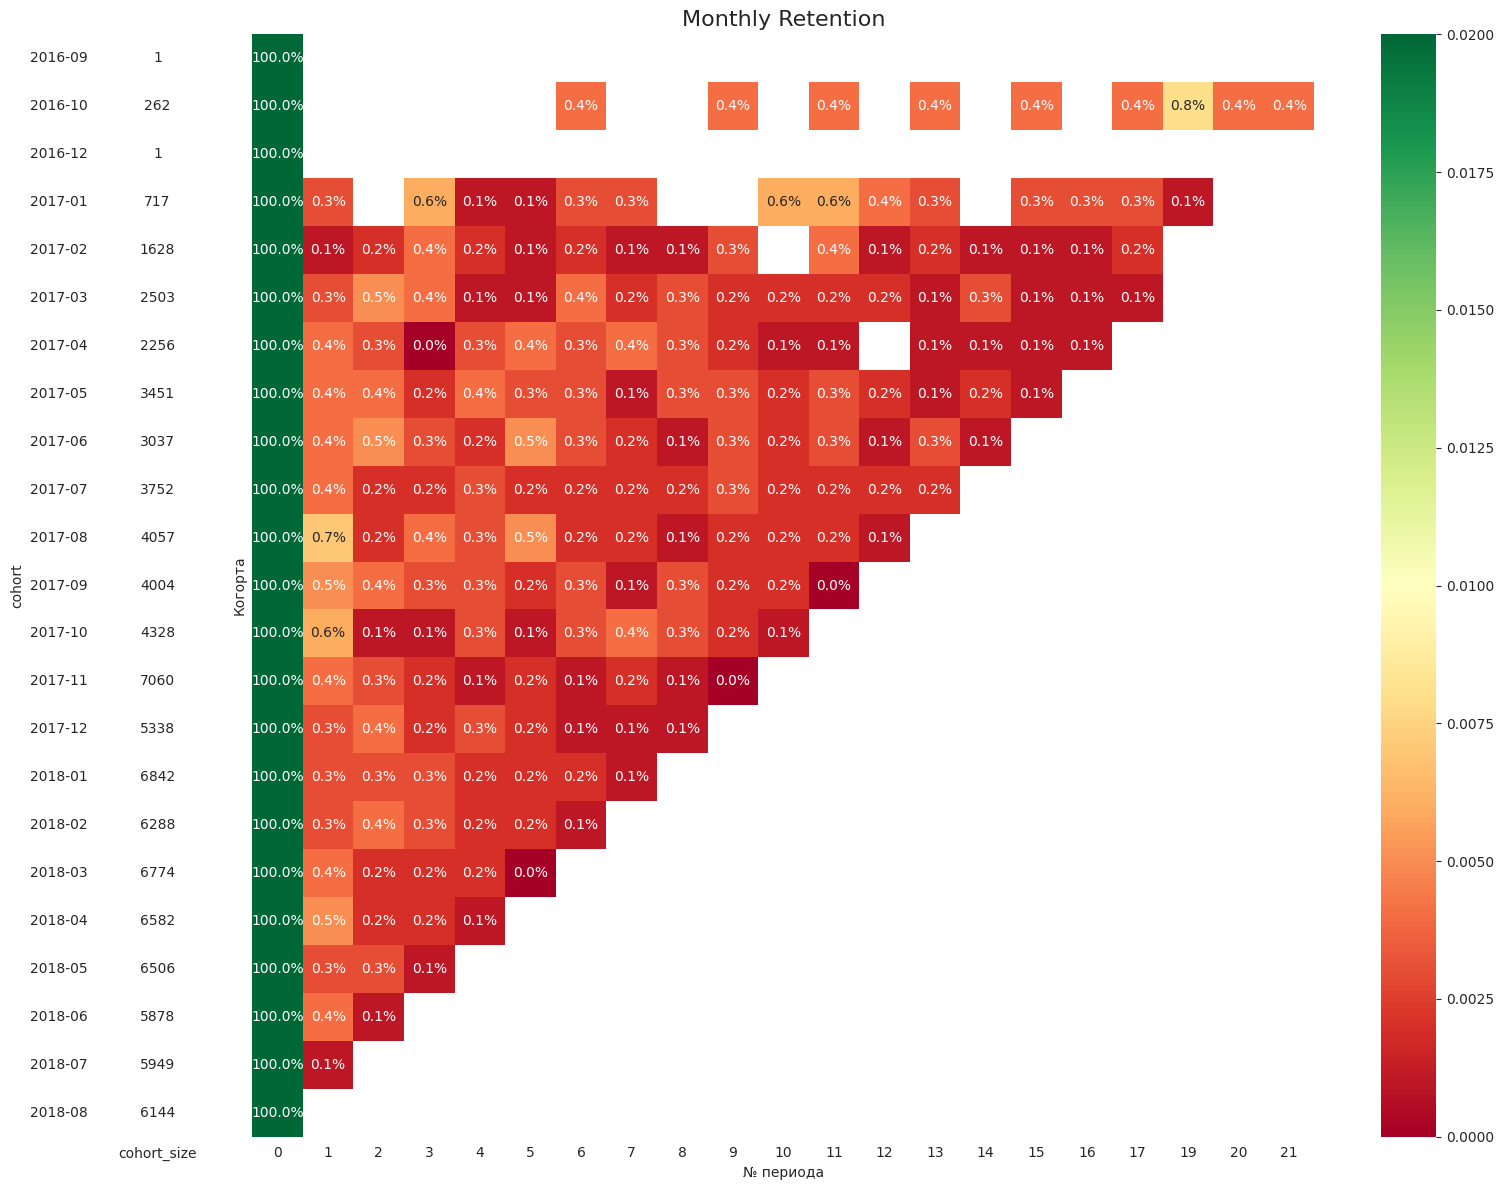

In [11]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention,
                mask=retention.isnull(),
                annot=True,
                fmt=".1%",
                cmap='RdYlGn',
                vmin=0,
                vmax=0.02,
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [12]:
median_month_1 = retention[1].dropna().median()
print(f"Медианный retention 1-го месяца: {median_month_1:.2%}")

Медианный retention 1-го месяца: 0.40%


In [13]:
month_3_retention = retention[3].dropna()
max_retention_value = month_3_retention.max()
top_cohorts = month_3_retention[month_3_retention == max_retention_value]

print("Когорты  с максимальным retention на 3-й месяц:")("Когорты ")
print(top_cohorts)


Когорты с максимальным retention на 3-й месяц:
cohort
2017-01    0.006
Freq: M, Name: 3, dtype: float64


## Задача 2. Определяем, существует ли product/market fit у этого маркетплейса.

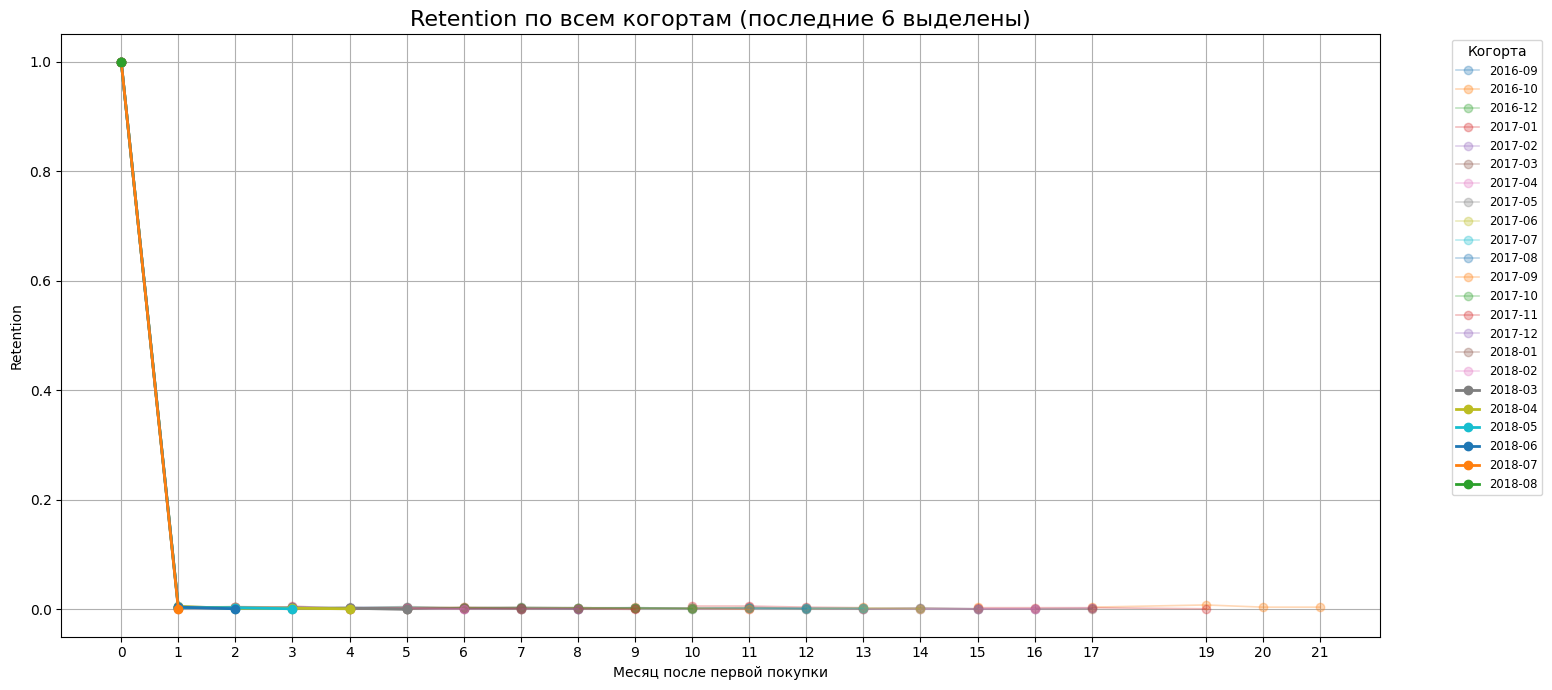

In [14]:
# Строим график retention по всем когортам, выделяя последние 6
plt.figure(figsize=(14, 7))

for cohort in retention.index:
    plt.plot(retention.columns, retention.loc[cohort], marker='o', label=str(cohort),
             linewidth=2 if cohort in retention.index[-6:] else 1.2,
             alpha=1.0 if cohort in retention.index[-6:] else 0.3)

plt.title("Retention по всем когортам (последние 6 выделены)", fontsize=16)
plt.xlabel("Месяц после первой покупки")
plt.ylabel("Retention")
plt.xticks(retention.columns)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Когорта", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()


<Figure size 1400x600 with 0 Axes>

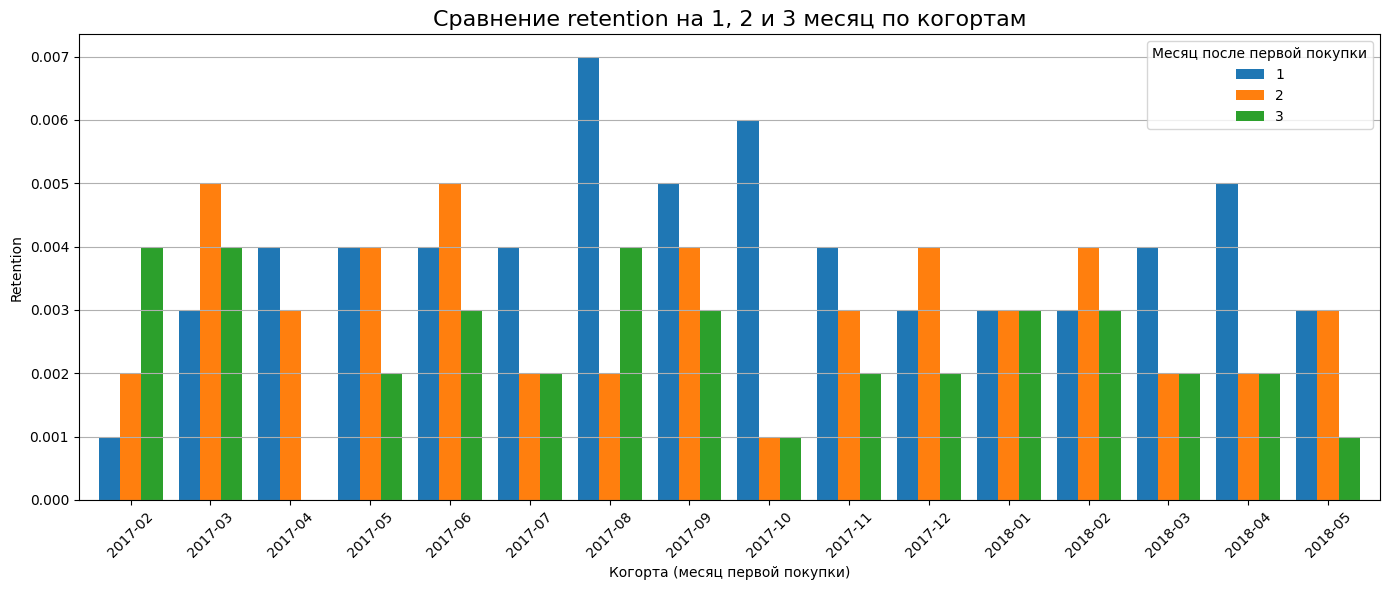

In [15]:
# Выберем retention на 1, 2 и 3 месяцы
retention_short = retention[[1, 2, 3]].dropna()

# Построим barplot для сравнения
plt.figure(figsize=(14, 6))
retention_short.plot(kind='bar', figsize=(14, 6), width=0.8)

plt.title("Сравнение retention на 1, 2 и 3 месяц по когортам", fontsize=16)
plt.xlabel("Когорта (месяц первой покупки)")
plt.ylabel("Retention")
plt.xticks(rotation=45)
plt.legend(title="Месяц после первой покупки")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Bывод о наличии Product/Market Fit

Анализ месячного retention по когортам показал:

- Retenton у всех кагорт быстро падает, что свидетельствует о слабом удержании пользователей 
после первой покупки.

- На 3-й и последующие месяцы удержание пользователей в большинстве когорт находится на низком уровне, 
что является признаком отсутствия устойчивого интереса со стороны клиентов.

Таким образом, устойчивого Product/Market Fit не достигнуто — пользователи пробуют продукт, но не возвращаются 
регулярно за повторными покупками.


Маркетплейс должен сконцентироваться на поиске причин оттока клиентов, возможно есть проблемы с доставкой, ассортиментом.
Также нужно изучить клиентов, сегментировать их и проверить нет ли сегментов с более высоким retention 
и проверить чем эти сегменты отличаются от остальных.

## Задача 3.Определим 5 основных метрик, на которых продакту можно сконцентрироваться, чтобы максимизировать прибыль компании.

1 МЕТРИКА Объём продаж маркетплейса  

2 МЕТРИКА Количество уникальных клиентов (MAU/WAU/DAU)

3 МЕТРИКА Конверсия новых пользователей в первую покупку

4 МЕТРИКА Retention пользователей (повторные покупки)

5 МЕТРИКА средний чек и его динамика

1 МЕТРИКА Объём продаж маркетплейса

In [16]:
# Объединяем заказы и товары по order_id
orders_items = orders.merge(items, on='order_id', how='inner')

# Фильтруем только доставленные заказы
orders_items = orders_items[orders_items['order_status'] == 'delivered']

# Добавим колонку с месяцем покупки
orders_items['order_month'] = orders_items['order_purchase_timestamp'].dt.to_period('M')

# Считаем суммарные продажи по месяцам
monthly_sales = orders_items.groupby('order_month')['price'].sum().reset_index()
monthly_sales['order_month'] = monthly_sales['order_month'].astype(str)
monthly_sales.columns = ['month', 'sales']

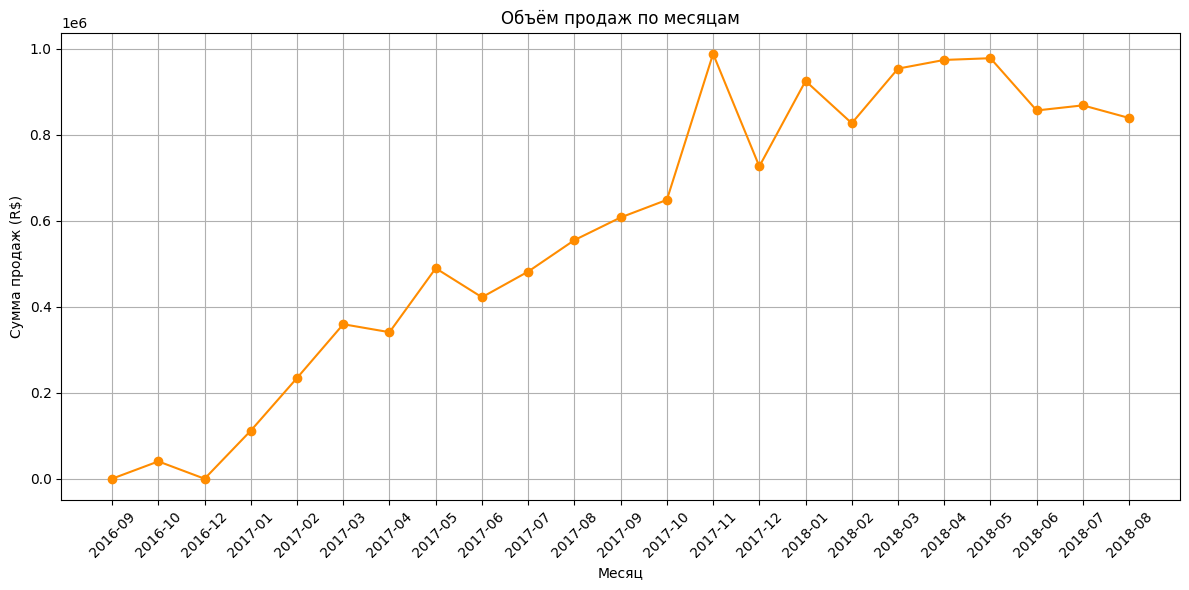

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month'], monthly_sales['sales'], marker='o', color='darkorange')
plt.title('Объём продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


2 МЕТРИКА Количество уникальных клиентов (MAU/WAU/DAU)

In [18]:
# Объединяем таблицу заказов и клиентов, чтобы получить customer_unique_id
orders_customers = orders.merge(customers[['customer_id', 'customer_unique_id']],
                                on='customer_id',
                                how='left')

# Фильтруем только доставленные заказы
orders_customers = orders_customers[orders_customers['order_status'] == 'delivered'].copy()
# Извлекаем только дату
orders_customers['purchase_date'] = orders_customers['order_purchase_timestamp'].dt.date

# DAU
dau = orders_customers.groupby('purchase_date')['customer_unique_id'].nunique().reset_index()
dau.columns = ['date', 'DAU']

# MAU
orders_customers['purchase_month'] = orders_customers['order_purchase_timestamp'].dt.to_period('M')
mau = orders_customers.groupby('purchase_month')['customer_unique_id'].nunique().reset_index()
mau.columns = ['month', 'MAU']

# WAU
orders_customers['purchase_week'] = orders_customers['order_purchase_timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
wau = orders_customers.groupby('purchase_week')['customer_unique_id'].nunique().reset_index()
wau.columns = ['week', 'WAU']

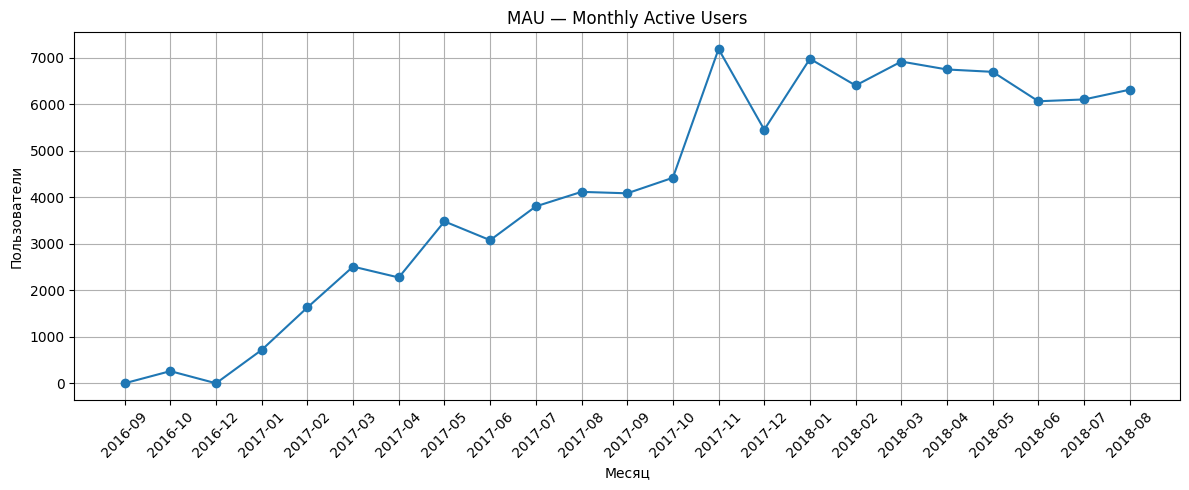

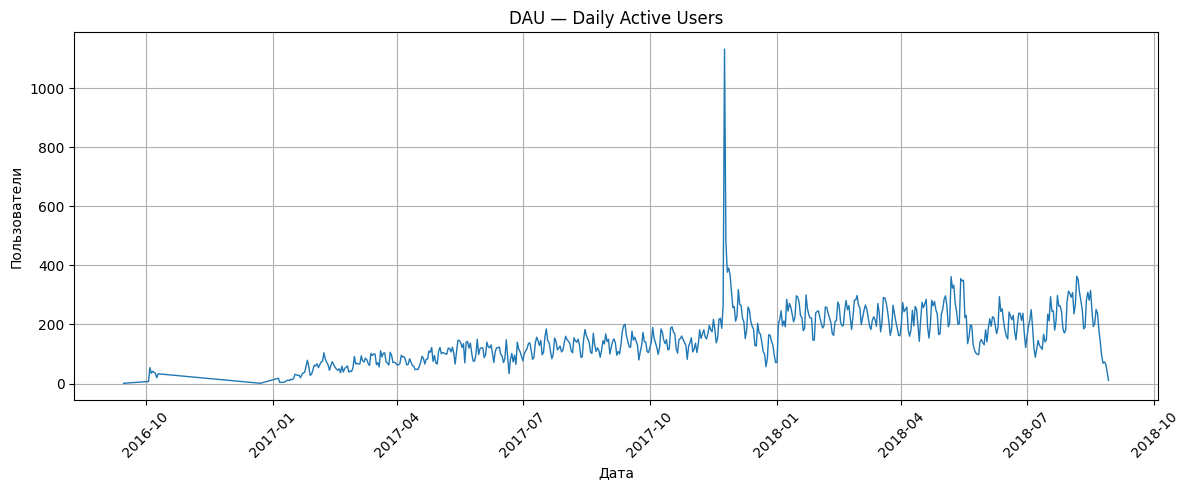

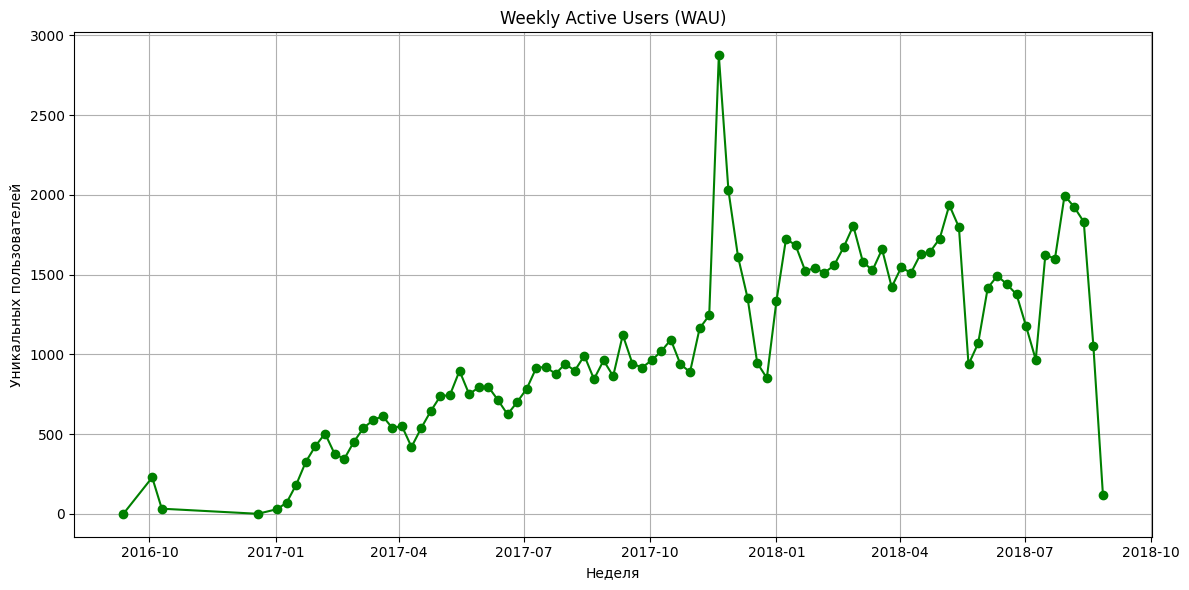

In [19]:
# Визуализация MAU
plt.figure(figsize=(12, 5))
plt.plot(mau['month'].astype(str), mau['MAU'], marker='o')
plt.title('MAU — Monthly Active Users')
plt.xlabel('Месяц')
plt.ylabel('Пользователи')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация DAU
plt.figure(figsize=(12, 5))
plt.plot(dau['date'], dau['DAU'], linewidth=1)
plt.title('DAU — Daily Active Users')
plt.xlabel('Дата')
plt.ylabel('Пользователи')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Визуализация WAU
plt.figure(figsize=(12, 6))
plt.plot(wau['week'], wau['WAU'], marker='o', color='green')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Неделя')
plt.ylabel('Уникальных пользователей')
plt.grid(True)
plt.tight_layout()
plt.show()

3 МЕТРИКА Конверсия новых пользователей в первую покупку

Так как нет данных сколько пользователей регистрируются на платформе и когда каждый из пользователей совершивших 
покупку зарегистрировался, не могу рассчиать сколько из них переходят в платящих.
Но в целом по результатам проведенного до этого анализа, также по графику продаж, метрикам  DAU/WAU/MAU можно сделать
вывод, что продажи только за счет новых покупателей, значит новых клиентов сперва продукт заинтересовывает.

4 МЕТРИКА Кумулятивный Retention пользователей

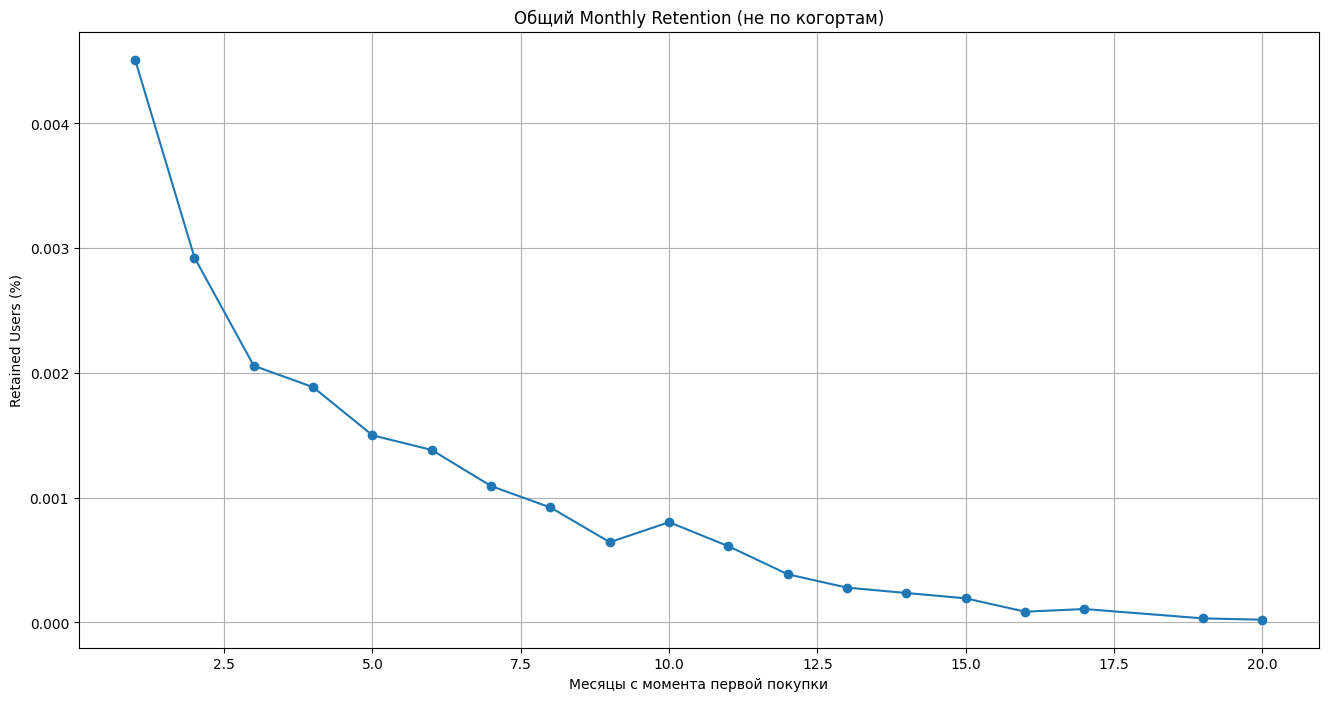

In [20]:
# Оставляем только доставленные заказы
delivered_orders = orders[orders["order_status"] == "delivered"].copy()

# Присоединяем customer_unique_id
delivered_orders = delivered_orders.merge(customers[["customer_id", "customer_unique_id"]],
                                          on="customer_id", how="left")

# Дата первой покупки
first_purchase = delivered_orders.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_unique_id', 'first_purchase_date']

# Присоединяем к основным данным
delivered_orders = delivered_orders.merge(first_purchase, on='customer_unique_id')

# Рассчитываем разницу в месяцах от первой покупки
delivered_orders['months_since_first'] = ((delivered_orders['order_purchase_timestamp'].dt.to_period('M') - 
                                           delivered_orders['first_purchase_date'].dt.to_period('M')).apply(lambda x: x.n))

# Убираем первую покупку
retention_months = delivered_orders[delivered_orders['months_since_first'] > 0]

# Группируем по количеству месяцев от первой покупки
monthly_retention = retention_months.groupby('months_since_first')['customer_unique_id'].nunique().reset_index()

# Количество уникальных пользователей, сделавших первую покупку
base_users = first_purchase['customer_unique_id'].nunique()
monthly_retention['retention'] = monthly_retention['customer_unique_id'] / base_users

monthly_retention

# Визуализация
plt.figure(figsize=(16, 8))
plt.plot(monthly_retention['months_since_first'], monthly_retention['retention'], marker='o')
plt.title('Общий Monthly Retention (не по когортам)')
plt.xlabel('Месяцы с момента первой покупки')
plt.ylabel('Retained Users (%)')
plt.grid(True)
plt.show()


5 МЕТРИКА средний чек и его динамика 

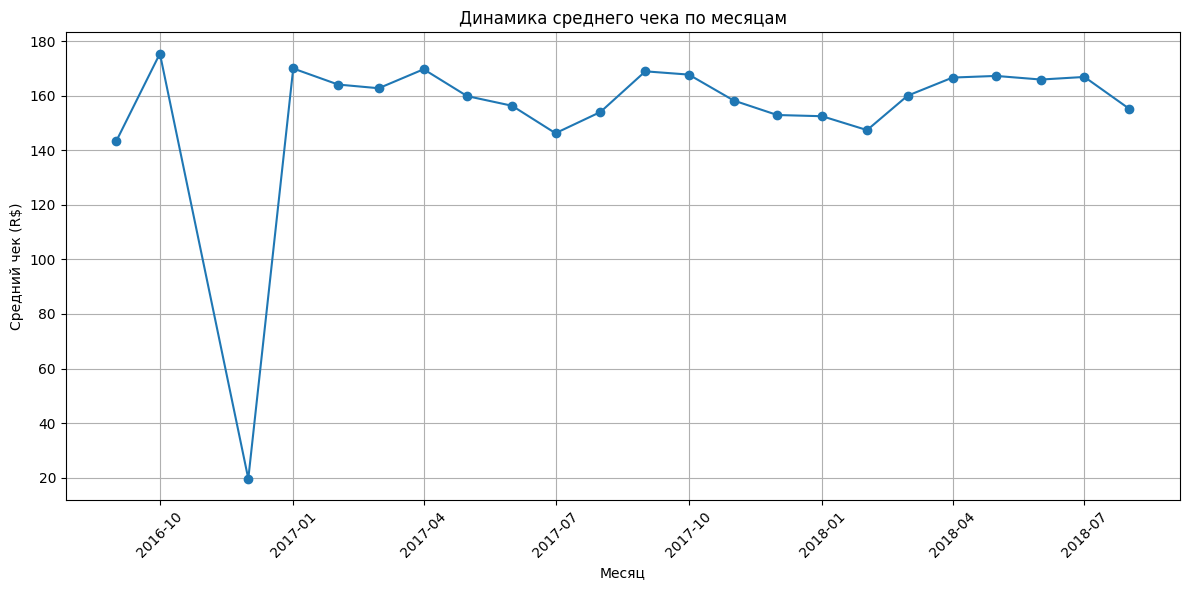

In [21]:
# Фильтруем только доставленные заказы
orders_delivered = orders[orders["order_status"] == "delivered"].copy()

# Добавим колонку "год-месяц"
orders_delivered["order_month"] = orders_delivered["order_purchase_timestamp"].dt.to_period("M")

# Объединяем заказы с товарными позициями
merged = pd.merge(items, orders_delivered[["order_id", "order_month"]], on="order_id", how="inner")

# Считаем total_payment = price + freight
merged["total_payment"] = merged["price"] + merged["freight_value"]

# Сумма и количество заказов по месяцам
monthly_stats = (
    merged.groupby("order_month")
    .agg(
        total_revenue=("total_payment", "sum"),
        num_orders=("order_id", "nunique"),
    )
    .reset_index()
)

# Средний чек
monthly_stats["avg_order_value"] = monthly_stats["total_revenue"] / monthly_stats["num_orders"]

# Преобразуем период обратно в datetime для графика
monthly_stats["order_month"] = monthly_stats["order_month"].dt.to_timestamp()

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats["order_month"], monthly_stats["avg_order_value"], marker='o')
plt.title("Динамика среднего чека по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Средний чек (R$)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Проанализирую подробнее данные по заказам и товарам

In [22]:

# Загрузка таблицы заказов
orders = pd.read_csv("olist_orders_dataset.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
])

# Группировка по статусу
order_status_counts = orders["order_status"].value_counts().reset_index()
order_status_counts.columns = ["order_status", "count"]
print(order_status_counts)


  order_status  count
0    delivered  96478
1      shipped   1107
2     canceled    625
3  unavailable    609
4     invoiced    314
5   processing    301
6      created      5
7     approved      2


А также проверю есть ли опоздания по доставке

In [23]:
# Только доставленные заказы (всё время)
delivered_all = orders[
    (orders["order_status"] == "delivered") &
    orders["order_delivered_customer_date"].notna() &
    orders["order_estimated_delivery_date"].notna()
].copy()
delivered_all["is_late"] = delivered_all["order_delivered_customer_date"] > delivered_all["order_estimated_delivery_date"]
print(delivered_all["is_late"].value_counts())

is_late
False    88644
True      7826
Name: count, dtype: int64


Проверю какие штаты делают заказы

   customer_state  order_count
25             SP        41746
18             RJ        12852
10             MG        11635
22             RS         5466
17             PR         5045
23             SC         3637
4              BA         3380
6              DF         2140
7              ES         2033
8              GO         2020
15             PE         1652
5              CE         1336
13             PA          975
12             MT          907
9              MA          747
11             MS          715
14             PB          536
16             PI          495
19             RN          485
1              AL          413
24             SE          350
26             TO          280
20             RO          253
2              AM          148
0              AC           81
3              AP           68
21             RR           46
/tmp/ipykernel_44/2231585666.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

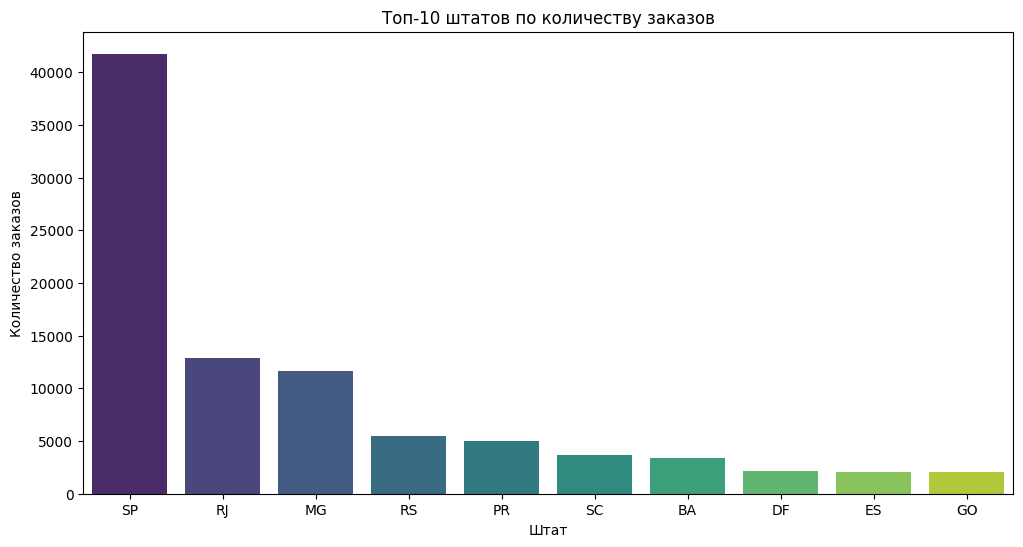

In [24]:
# Объединяем по customer_id, чтобы получить штат для каждого заказа
orders_customers = orders.merge(customers[["customer_id", "customer_state"]], on="customer_id", how="left")

# Считаем количество заказов по штатам
orders_by_state = orders_customers.groupby("customer_state")["order_id"].count().reset_index()
orders_by_state.columns = ["customer_state", "order_count"]

# Сортируем по убыванию
orders_by_state = orders_by_state.sort_values(by="order_count", ascending=False)

print(orders_by_state)

# Визуализация топ-10 штатов по количеству заказов
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_state.head(10), x="customer_state", y="order_count", palette="viridis")
plt.title("Топ-10 штатов по количеству заказов")
plt.xlabel("Штат")
plt.ylabel("Количество заказов")
plt.show()

Проверю что с опозданиями доставки (в общем и по штатам)

In [25]:
# Фильтрация без ограничения по дате
delivered_all = orders[
    (orders["order_status"] == "delivered") &
    (orders["order_delivered_customer_date"].notna()) &
    (orders["order_estimated_delivery_date"].notna())
].copy()

# Счёт опозданий
delivered_all["is_late"] = delivered_all["order_delivered_customer_date"] > delivered_all["order_estimated_delivery_date"]

# Итог
print("Всего доставленных заказов:", len(delivered_all))
print("Всего опозданий:", delivered_all['is_late'].sum())

Всего доставленных заказов: 96470
Всего опозданий: 7826


   customer_state  total_orders  late_orders  avg_delay_days  late_ratio
1              AL           397           95       -8.707809    0.239295
9              MA           717          141       -9.571827    0.196653
16             PI           476           76      -11.306723    0.159664
5              CE          1279          196      -10.804535    0.153245
24             SE           335           51      -10.020896    0.152239
4              BA          3256          457      -10.794533    0.140356
18             RJ         12350         1664      -11.761215    0.134737
26             TO           274           35      -12.131387    0.127737
13             PA           946          117      -14.066596    0.123679
7              ES          1995          244      -10.496241    0.122306
21             RR            41            5      -17.292683    0.121951
11             MS           701           81      -11.052782    0.115549
14             PB           517           57      -

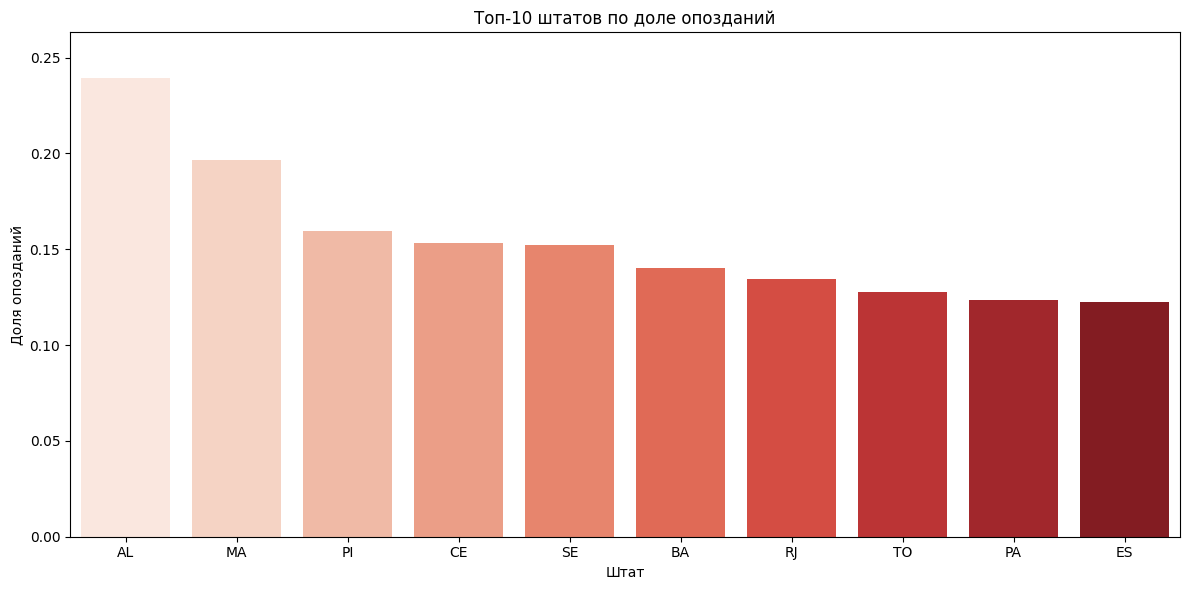

In [26]:
# Объединяем с таблицей клиентов, чтобы получить штат
delivered_all = delivered_all.merge(
    customers[["customer_id", "customer_state"]],
    on="customer_id",
    how="left"
)

# Группировка по штатам
delay_by_state = delivered_all.groupby("customer_state").agg(
    total_orders=("order_id", "count"),
    late_orders=("is_late", "sum")
).reset_index()

# Средняя задержка в днях — только для тех, у кого есть задержка
delivered_all["delay_days"] = (
    delivered_all["order_delivered_customer_date"] - delivered_all["order_estimated_delivery_date"]
).dt.days

delay_by_state = delay_by_state.merge(
    delivered_all.groupby("customer_state")["delay_days"].mean().reset_index(name="avg_delay_days"),
    on="customer_state",
    how="left"
)

# Доля опозданий
delay_by_state["late_ratio"] = delay_by_state["late_orders"] / delay_by_state["total_orders"]

# Сортировка по доле опозданий
delay_by_state = delay_by_state.sort_values(by="late_ratio", ascending=False)

# Вывод
print(delay_by_state)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=delay_by_state.head(10),
    x="customer_state",
    y="late_ratio",
    palette="Reds"
)
plt.title("Топ-10 штатов по доле опозданий")
plt.xlabel("Штат")
plt.ylabel("Доля опозданий")
plt.ylim(0, delay_by_state["late_ratio"].max() * 1.1)
plt.tight_layout()
plt.show()


Пока вывод что низкий ретеншн не по причине отсутсвия товара, не по причине проблем с доставкой
(опозданния есть но не так много) и сперва у клиента есть заинтересованность.

## Задача 4. Выберем одну из 3 основных гипотез с помощью фреймворка ICE.

#### Гипотезы :
1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.  
2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.  
3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.  


### Гипотеза 1: избавляемся от отмен

In [27]:
orders_june17 = orders[orders["order_purchase_timestamp"] >= "2017-06-01"].copy()
orders_june17["order_status"].value_counts()

order_status
delivered      85413
shipped          912
canceled         499
unavailable      475
invoiced         240
processing       202
created            5
Name: count, dtype: int64

In [28]:
Impact_1 = (499)
Impact_1

499

Impact_1 = 4 (попадает в интервал 351 - 750)

### Гипотеза 2: уменьшаем опоздания

In [29]:
# Фильтрация по условиям: только доставленные, с обеими датами, с покупкой начиная с июня 2017
orders_june17 = orders[
    (orders["order_status"] == "delivered") &
    (orders["order_delivered_customer_date"].notna()) &
    (orders["order_estimated_delivery_date"].notna()) &
    (orders["order_purchase_timestamp"] >= "2017-06-01")
].copy()

# Флаг опоздания
orders_june17["is_late"] = orders_june17["order_delivered_customer_date"] > orders_june17["order_estimated_delivery_date"]

# Итог
total_delivered_june17 = len(orders_june17)
total_late_june17 = orders_june17["is_late"].sum()

print("Всего доставленных заказов с июня 2017:", total_delivered_june17)
print("Всего опозданий с июня 2017:", total_late_june17)


Всего доставленных заказов с июня 2017: 85406
Всего опозданий с июня 2017: 7295


In [30]:
Impact_2 = 7295*0.004
Impact_2

29.18

Impact_2 = 1 (попадает в интервал 0-50)

### Гипотеза 3

In [31]:
# Преобразуем даты
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])

# Только заказы с июня 2017
orders_june17 = orders[orders["order_purchase_timestamp"] >= "2017-06-01"].copy()

# Считаем количество заказов по каждому клиенту
orders_per_customer = orders_june17.groupby("customer_id")["order_id"].count().reset_index()
orders_per_customer.columns = ["customer_id", "order_count"]

# Находим клиентов с одним заказом
one_time_customers = orders_per_customer[orders_per_customer["order_count"] == 1]

# Количество таких клиентов
num_one_time_customers = len(one_time_customers)

# Конверсия в повторный заказ — медианный retention 1-го месяца = 0.5%
retention_rate = 0.004

# Прирост заказов по гипотезе
expected_new_orders = int(num_one_time_customers * retention_rate)

Impact_3 = expected_new_orders
Impact_3

350

Impact_3 = 4 (попадает в интервал 351 - 750)

Гипотеза 1 
Impact 4
Confidence 8
Ease 6

Гипотеза 2
Impact 1
Confidence 10
Ease 4

Гипотеза 3
Impact 4
Confidence 5
Ease 9

In [41]:
data = {
    "Hypothesis": [
        "Гипотеза 1",
        "Гипотеза 2",
        "Гипотеза 3"
    ],
    "Impact": [4, 1, 4],
    "Confidence": [8, 10, 5],
    "Ease": [6, 4, 9]
}

df_ice = pd.DataFrame(data)
df_ice["ICE"] = df_ice["Impact"] * df_ice["Confidence"] * df_ice["Ease"]

df_ice

,Hypothesis,Impact,Confidence,Ease,ICE
0,Гипотеза 1,4,8,6,192
1,Гипотеза 2,1,10,4,40
2,Гипотеза 3,4,5,9,180


### Вывод - выбираем Гипотезу 1 

## Задача 5. Выбираем нужные метрики, на которые ваша гипотеза должна повлиять.

1. **Целевая метрика — Конверсия в повторный заказ**  
   Расчёт доли клиентов, сделавших второй заказ за период после внедрения нового способа оплаты.  
   Главная цель гипотезы — увеличить количество повторных заказов, эта метрика покажет эффективность.

2. **Прокси-метрика — Объем продаж**  
   Объем продаж (суммарная выручка или количество заказов) отражает общую активность покупателей и чувствителен  
   к изменениям как в первичных, так и в повторных заказах.  
   Если новый способ оплаты удобнее, это может стимулировать не только повторные заказы, но и рост количества новых заказов.

3. **Guardrail-метрики — Процент отказов/отмен заказов при оплате и Количество обращений в поддержку**  
   Расчёт доли неуспешных попыток оплаты по сравнению с общим числом попыток покажет, если внедрение нового способа оплаты  
   вызовет технические проблемы или неудобства, приводящие к сбоям оплаты.  
   Также как и метрика количества обращений в службу поддержки, связанных с новым способом оплаты.

## Задача 6. Формулируем выводы о проделанной работе и рекомендации.

## Выводы по анализу маркетплейса

### 1. Формализация проблемы продукта
Проблема — низкий ретеншн клиентов, особенно в первый месяц после заказа. Анализ показал, что такие причины, как отмены, опоздания и отсутствие товара, не объясняют отток. Основная причина — предполагаем неудобства при оформлении и оплате заказов.

### 2. Общие выводы
- Ретеншн в первый месяц составляет около 0.5%, что указывает на слабую повторную вовлеченность при этом так как количество заказов в целом увеличивается за счет новых клиентов которые делают первую покупку, можем говорить о том что продукт сперва вызывает инетерес.
- Отказы и отмены заказов не являются ключевой причиной оттока.
- Опоздания с доставкой есть, но незначительны и не влияют на ретеншн существенно.
- Анализ по регионам не выявил проблемных зон с доставкой или отменами.
- Гипотеза с новым способом оплаты получила наивысший балл по модели ICE, показывая высокий потенциал улучшения.

### 3. Рекомендации
- Внедрить новый, более удобный способ оплаты для упрощения оформления.
- Провести A/B-тест для проверки влияния нового способа оплаты на ключевые метрики:
  - Целевая: конверсия в повторный заказ
  - Прокси: общий объем продаж
  - Guardrail: процент отказов при оплате и количество обращений в техподдержку
- Следить за качеством доставки и отменами, чтобы не ухудшить опыт пользователей.
- При успешных результатах масштабировать решение для увеличения удержания и доходов.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4be17dce-80ef-4cee-9f0e-a041cc84d2ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>